In [1]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import json

In [34]:
def makeTS(filename):
    df = pd.read_json(filename,orient='split')
    dates = pd.to_datetime(df['Date'])
    ts = Series(list(df['Link']), index=dates)
    return ts

def makeSubplot(ts,period,axs,ax,color,label):
    watches = ts.resample(period).count()
    
    if period =='W':
        time = 'week'
    elif period == 'M':
        time = 'month'
    elif period == 'D':
        time = 'day' 
        
    axs[ax].plot(watches.index,watches,color=color, label=label)
    #axs[ax].legend()
    
def makePlot(data,period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10,len(data)*2))
    
    for i in range(len(data)):
        filename = data[i]
        ts = makeTS(filename)
        color = plt.cm.viridis(i / len(data))  # Generate color based on position
        label = filename[8:-5]
        makeSubplot(ts,period,axs,i,color,label)
        
    codes = [file[8:-5] for file in data]
    fig.legend(codes, loc='upper right')
    
    plt.tight_layout()
    plt.show()

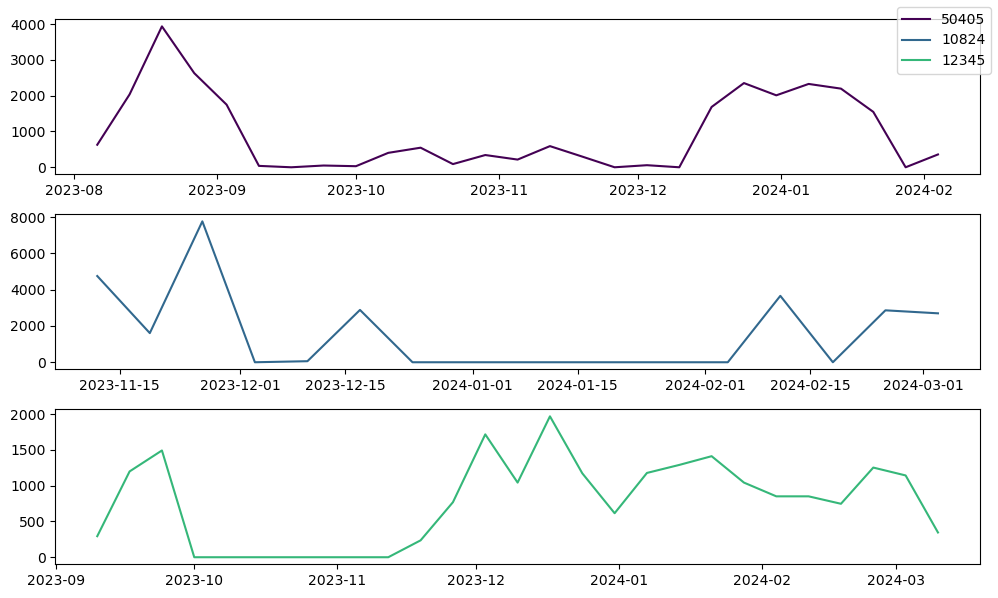

In [35]:
data = ['Sec1Gr1_50405.json','Sec1Gr1_10824.json','Sec1Gr1_12345.json']
makePlot(data,'W')